In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import pickle
import os

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_9_WT_150k_CS3.csv"
df = pd.read_csv(path)

## Filtern und Vorbereiten der Analyse

In [35]:
# Fahrten auf solche mit anschließendem Ladevorgang filtern
filt = df["Charge_start"].notnull()
df_filt = df[filt]

In [36]:
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,2,475.0,32,530.0,55.0,31.14,270.0,100.0,89.0,530.0,594.0
1,0.2,2,2,1,800.0,53,807.0,7.0,3.83,560.0,100.0,98.6,807.0,815.0
2,0.3,3,1,4,1367.0,91,1375.0,8.0,4.37,987.0,100.0,98.4,1375.0,1384.0
4,1.2,2,5,2,383.0,26,384.0,1.0,0.78,413.0,95.9,95.7,384.0,413.0
5,1.3,3,2,1,797.0,53,921.0,124.0,70.54,246.0,100.0,80.7,921.0,1049.0


In [37]:
# Anzahl Fahrzeuge entspricht Anzahl der ersten Trips
no_cars = len(df[df["Trip_no"]==1])

In [38]:
# reduzierte Liste neu indizieren
df_filt.reset_index(drop=True, inplace=True)
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,2,475.0,32,530.0,55.0,31.14,270.0,100.0,89.0,530.0,594.0
1,0.2,2,2,1,800.0,53,807.0,7.0,3.83,560.0,100.0,98.6,807.0,815.0
2,0.3,3,1,4,1367.0,91,1375.0,8.0,4.37,987.0,100.0,98.4,1375.0,1384.0
3,1.2,2,5,2,383.0,26,384.0,1.0,0.78,413.0,95.9,95.7,384.0,413.0
4,1.3,3,2,1,797.0,53,921.0,124.0,70.54,246.0,100.0,80.7,921.0,1049.0


## Ermitteln der Anzahl ladender Fahrzeuge über Zeitverlauf

In [39]:
# erhöhen des cars_charging Zähler um 1 für jeden Ladevorgang zwischen Charge_start und Charge_end
def calc_cars_charging(df_filt):
    # initialisieren Liste 
    cars_charging = [0 for i in range(1441)]
    for i in range(len(df_filt)):
        if df_filt.at[i, "Charge_start"] < df_filt.at[i, "Charge_end"]:
            for j in range(int(df_filt.at[i, "Charge_start"]), int(df_filt.at[i, "Charge_end"]) + 1):
                cars_charging[j] += 1
        else: 
            for j in range(int(df_filt.at[i, "Charge_start"]), 1441):
                cars_charging[j] += 1
            for j in range(0, int(df_filt.at[i, "Charge_end"])):
                cars_charging[j] += 1
    return cars_charging

In [40]:
cars_charging_total = calc_cars_charging(df_filt)
# normieren des Ergebnis auf Anzahl simulierter Fahrzeuge
# ACHTUNG: Wert anpassen, bei Anpassung der Simulation (Globalvariable in Ergebnis speichern und hier über Variable definieren?)
relative_cars_charging_total = [x/no_cars for x in cars_charging_total]

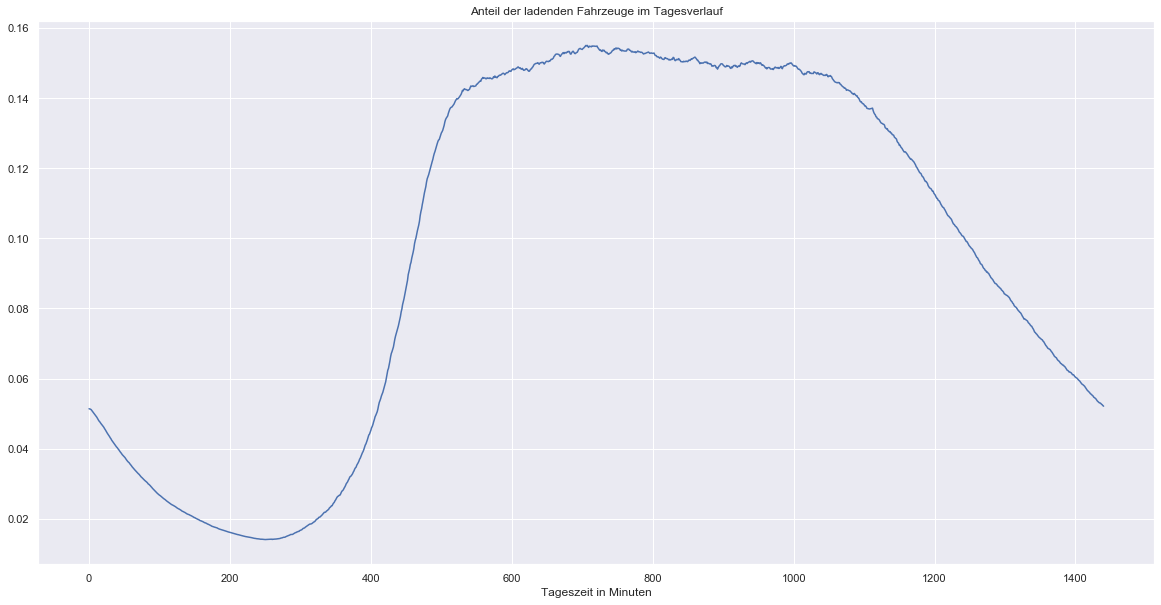

In [41]:
# Visualisieren
sns.set()
plt.figure(figsize=(20,10))
x = np.linspace(0, 1440, 1441)
plt.title("Anteil der ladenden Fahrzeuge im Tagesverlauf")
plt.xlabel("Tageszeit in Minuten")
plt.plot(x, relative_cars_charging_total);

## Anteiliges darstellen der Ladevorgänge nach Zustand

In [42]:
# Aufteilen des Datensatz nach Zustand in dem geladen wird

filt = df_filt["Whyto"] == 1
df_home = df_filt[filt]
df_home.reset_index(drop=True, inplace=True)

filt = df_filt["Whyto"] == 2
df_work = df_filt[filt]
df_work.reset_index(drop=True, inplace=True)

filt = df_filt["Whyto"] == 3
df_shopping = df_filt[filt]
df_shopping.reset_index(drop=True, inplace=True)

filt = df_filt["Whyto"] == 4
df_recreational = df_filt[filt]
df_recreational.reset_index(drop=True, inplace=True)

filt = df_filt["Whyto"] == 5
df_other = df_filt[filt]
df_other.reset_index(drop=True, inplace=True)

In [43]:
# berechnen der Anzahl an Fahrzeugen die laden

cars_charging_home = calc_cars_charging(df_home)
cars_charging_work = calc_cars_charging(df_work)
cars_charging_shopping = calc_cars_charging(df_shopping)
cars_charging_recreational = calc_cars_charging(df_recreational)
cars_charging_other = calc_cars_charging(df_other)

In [44]:
# normieren auf Gesamtanzahl simulierter Fahrzeuge
relative_cars_charging_home = [x/no_cars for x in cars_charging_home]
relative_cars_charging_work = [x/no_cars for x in cars_charging_work]
relative_cars_charging_shopping = [x/no_cars for x in cars_charging_shopping]
relative_cars_charging_recreational = [x/no_cars for x in cars_charging_recreational]
relative_cars_charging_other = [x/no_cars for x in cars_charging_other]

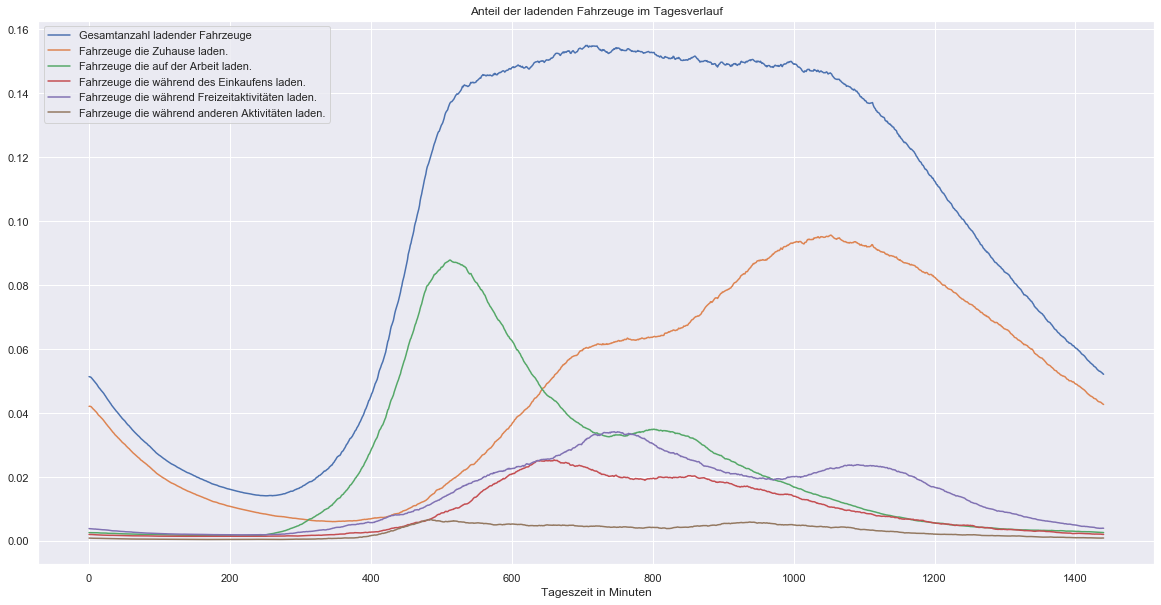

In [45]:
# Visualisieren des Ergebnisses

plt.figure(figsize=(20,10));
x = np.linspace(0, 1440, 1441)
plt.title("Anteil der ladenden Fahrzeuge im Tagesverlauf");
plt.xlabel("Tageszeit in Minuten");
plt.plot(x, relative_cars_charging_total, label="Gesamtanzahl ladender Fahrzeuge");
plt.plot(x, relative_cars_charging_home, label="Fahrzeuge die Zuhause laden.");
plt.plot(x, relative_cars_charging_work, label="Fahrzeuge die auf der Arbeit laden.");
plt.plot(x, relative_cars_charging_shopping, label="Fahrzeuge die während des Einkaufens laden.");
plt.plot(x, relative_cars_charging_recreational, label="Fahrzeuge die während Freizeitaktivitäten laden.");
plt.plot(x, relative_cars_charging_other, label="Fahrzeuge die während anderen Aktivitäten laden.");
plt.legend();

## Vergleich mit Ausgangsdatensatz

In [46]:
import pickle
path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsauswertung\EBZ NHTS\Werktag\Auswertungsergebnisse\Ladende_Fahrzeuge_CS3.pickle"
nhts_ebz = pickle.load(open(path, "rb"))

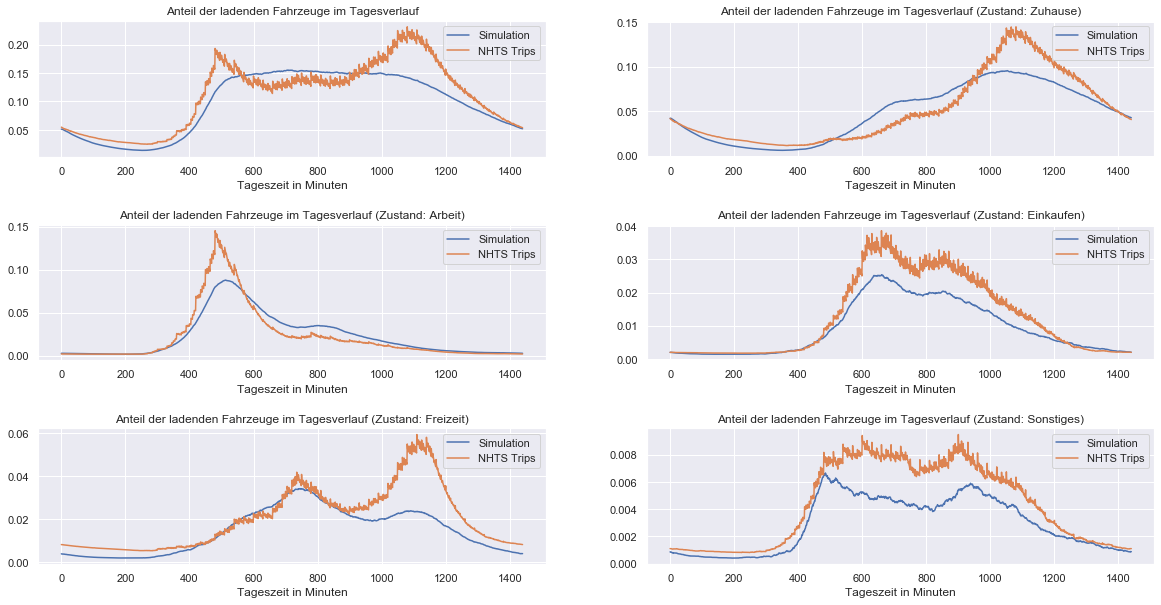

In [47]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,10))
plt.subplots_adjust(hspace=0.5)

ax1.plot(x, relative_cars_charging_total, label="Simulation");
ax1.plot(x, nhts_ebz[0], label="NHTS Trips")
ax1.set_title("Anteil der ladenden Fahrzeuge im Tagesverlauf");
ax1.set_xlabel("Tageszeit in Minuten");
ax1.legend();

ax2.plot(x, relative_cars_charging_home, label="Simulation");
ax2.plot(x, nhts_ebz[1], label="NHTS Trips")
ax2.set_title("Anteil der ladenden Fahrzeuge im Tagesverlauf (Zustand: Zuhause)");
ax2.set_xlabel("Tageszeit in Minuten");
ax2.legend();

ax3.plot(x, relative_cars_charging_work, label="Simulation");
ax3.plot(x, nhts_ebz[2], label="NHTS Trips")
ax3.set_title("Anteil der ladenden Fahrzeuge im Tagesverlauf (Zustand: Arbeit)");
ax3.set_xlabel("Tageszeit in Minuten");
ax3.legend();

ax4.plot(x, relative_cars_charging_shopping, label="Simulation");
ax4.plot(x, nhts_ebz[3], label="NHTS Trips")
ax4.set_title("Anteil der ladenden Fahrzeuge im Tagesverlauf (Zustand: Einkaufen)");
ax4.set_xlabel("Tageszeit in Minuten");
ax4.legend();

ax5.plot(x, relative_cars_charging_recreational, label="Simulation");
ax5.plot(x, nhts_ebz[4], label="NHTS Trips")
ax5.set_title("Anteil der ladenden Fahrzeuge im Tagesverlauf (Zustand: Freizeit)");
ax5.set_xlabel("Tageszeit in Minuten");
ax5.legend();

ax6.plot(x, relative_cars_charging_other, label="Simulation");
ax6.plot(x, nhts_ebz[5], label="NHTS Trips")
ax6.set_title("Anteil der ladenden Fahrzeuge im Tagesverlauf (Zustand: Sonstiges)");
ax6.set_xlabel("Tageszeit in Minuten");
ax6.legend();

In [48]:
import os

path = os.getcwd()+"\\EBZ_Simulation.pickle"

ebz_simulation = [relative_cars_charging_total, relative_cars_charging_home, \
                  relative_cars_charging_work, relative_cars_charging_shopping, \
                  relative_cars_charging_recreational, relative_cars_charging_other]

pickle.dump(ebz_simulation, open(path, "wb") )